In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv("C:\\Users\\shinchan\\Desktop\\Python Practise\\EDA\\StudentPerformanceDataset\\StudentsPerformance.csv")

In [ ]:
# 1. understand the data..

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [8]:
df.shape

(1000, 8)

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [19]:
# For separately checking unique values for a column...
categorical_columns = ['gender','race/ethnicity','parental level of education','lunch','test preparation course']
for i in categorical_columns:
    print(i,'-',df[i].unique())

gender - ['female' 'male']
race/ethnicity - ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education - ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch - ['standard' 'free/reduced']
test preparation course - ['none' 'completed']


In [20]:
# 2. clean the data ...

In [22]:
#check for the null values in dataframe..
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [23]:
# removing the unnecesary not needed in further eavluation..
students = df.drop(['gender','race/ethnicity','parental level of education'], axis = 1)

In [24]:
students

,lunch,test preparation course,math score,reading score,writing score
0,standard,none,72,72,74
1,standard,completed,69,90,88
2,standard,none,90,95,93
3,free/reduced,none,47,57,44
4,standard,none,76,78,75
...,...,...,...,...,...
995,standard,completed,88,99,95
996,free/reduced,none,62,55,55
997,free/reduced,completed,59,71,65
998,standard,completed,68,78,77


In [25]:
# Check for the outliers...

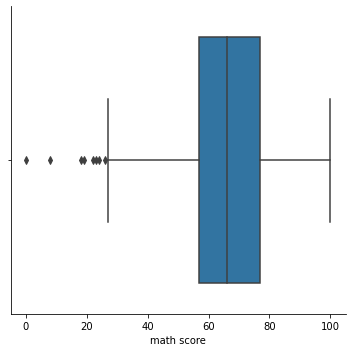

In [50]:
sns.catplot(x='math score', kind = 'box', data = students )

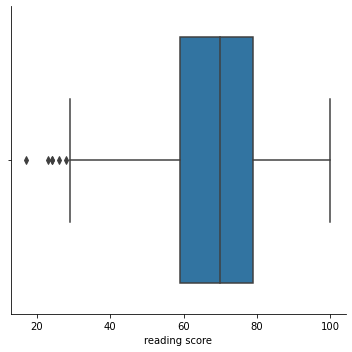

In [51]:
sns.catplot(x='reading score', kind = 'box', data = students )

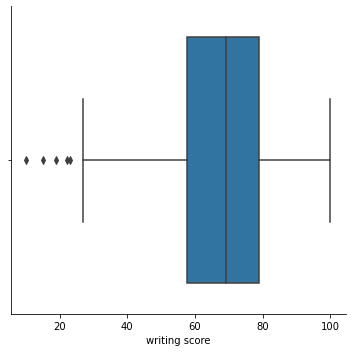

In [52]:
sns.catplot(x='writing score', kind = 'box', data = students )

In [26]:
# 3. Relationship analysis..

In [28]:
# Correlationship matrix
correlation = students.corr()
correlation

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot:>

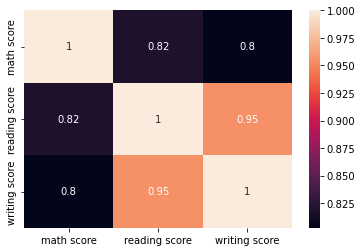

In [29]:
# plotting the heatmap for the above correlation matrix
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

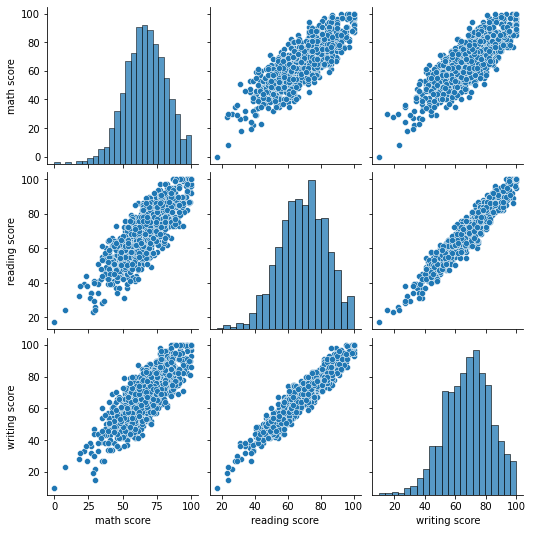

In [41]:
sns.pairplot(students)

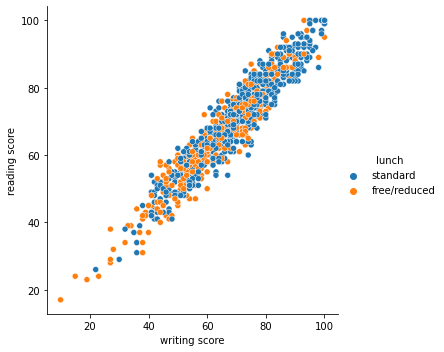

In [42]:
# Scatterplot...
sns.relplot(x='writing score', y='reading score', hue ='lunch', data =students)

C:\Users\shinchan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

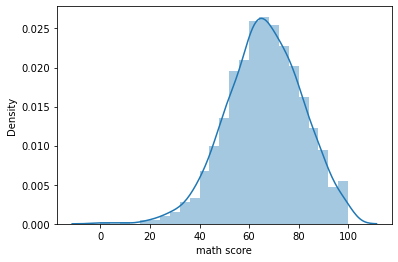

In [46]:
# check the distribution of data
sns.distplot(students['math score'])

C:\Users\shinchan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

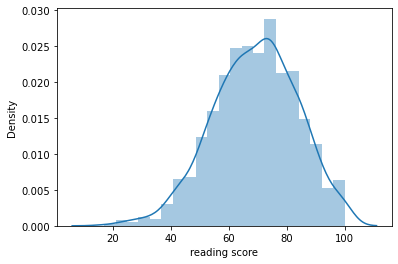

In [47]:
sns.distplot(students['reading score'])

C:\Users\shinchan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

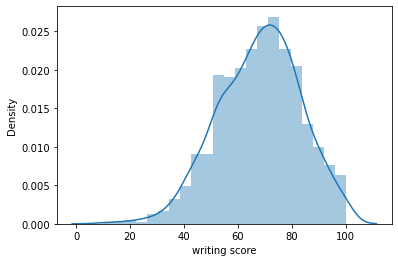

In [48]:
sns.distplot(students['writing score'])

C:\Users\shinchan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='writing score', ylabel='Density'>

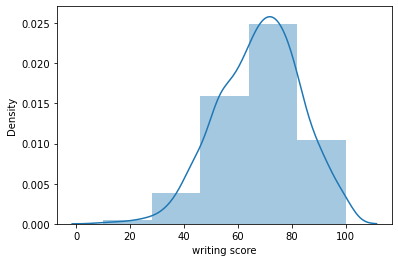

In [49]:
sns.distplot(students['writing score'], bins =5)